---

## Microbiology Lab Database Project

This project involves creating and interacting with an SQLite database for a microbiology lab. The goal is to store and manage data related to sequencing samples using a graphical user interface (GUI) built with Tkinter.

### Project Steps:

1. **Database Creation:** Initially, an SQLite database file named `microbiology_lab.db` is created using the `sqlite3` library. The database is designed to store information about sequencing samples, including sample ID, source, project details, sequencing platform, reads, QC status, species, and ST types.

2. **GUI Development:** Using the Tkinter library, a GUI is built to provide a user-friendly interface for entering and modifying data in the database. Entry fields and buttons are created to collect information from the user and perform the required database operations.

3. **Insertion of Data:** The GUI allows users to enter details for sequencing samples. When the user clicks the "Submit" button, the data is inserted into the "Sequencing" table of the database.

4. **Data Retrieval:** To verify the successful insertion of data, a SELECT statement is executed to retrieve the inserted records from the "Sequencing" table. The retrieved data is then printed to the console.

5. **Modification of Data:** The GUI includes an option to modify or edit existing entries in the "Sequencing" table. Users can select a specific entry and update its fields, triggering an UPDATE statement to modify the corresponding record in the database.

### Dependencies:

- Python 3.x
- sqlite3 library
- Tkinter library

### Instructions:

1. Run the code to create the SQLite database and start the GUI.
2. Enter the details for each sequencing sample in the provided entry fields.
3. Click the "Submit" button to insert the data into the database.
4. Use the "Edit" buttons to modify specific entries if needed.
5. Run the SELECT statement to retrieve and print the inserted data.

---



In [25]:
#import libraries
import sqlite3 as db
import pandas as pd
from sqlite3 import Error

In [26]:
# Connect to the database or create if it doesn't exist
conn = db.connect('microbiology_lab.db')

# Create a cursor
c = conn.cursor()

# Close the cursor and connection when you're done
#c.close()
#conn.close()

In [27]:
c.execute('''
    CREATE TABLE IF NOT EXISTS Sequencing (
        Sample_ID TEXT PRIMARY KEY,
        Source TEXT,
        Project_name TEXT,
        Project_id TEXT,
        Sequencing_platform TEXT,
        Total_reads TEXT,
        QC_passed TEXT,
        Species TEXT,
        ST_Types TEXT,
        FOREIGN KEY (sample_id) REFERENCES Samples (sample_id)
    )
''')

# Close the cursor and connection when you're done
#c.close()
#conn.close()

In [32]:
import tkinter as tk
import sqlite3 as db

def submit_data():
    sample_id = entry_sample_id.get()
    source = entry_source.get()
    project_name = entry_project_name.get()
    project_id = entry_project_id.get()
    sequencing_platform = entry_sequencing_platform.get()
    total_reads = entry_total_reads.get()
    qc_passed = entry_qc_passed.get()
    species = entry_species.get()
    st_types = entry_st_types.get()
    
    conn = db.connect('microbiology_lab.db')
    c = conn.cursor()
    
    c.execute('''
        INSERT INTO Sequencing (Sample_ID, Source, Project_name, Project_id, Sequencing_platform, Total_reads, QC_passed, Species, ST_Types)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (sample_id, source, project_name, project_id, sequencing_platform, total_reads, qc_passed, species, st_types))
    
    conn.commit()
    conn.close()
    
    entry_sample_id.delete(0, tk.END)
    entry_source.delete(0, tk.END)
    entry_project_name.delete(0, tk.END)
    entry_project_id.delete(0, tk.END)
    entry_sequencing_platform.delete(0, tk.END)
    entry_total_reads.delete(0, tk.END)
    entry_qc_passed.delete(0, tk.END)
    entry_species.delete(0, tk.END)
    entry_st_types.delete(0, tk.END)

root = tk.Tk()

# Create labels for each field
label_sample_id = tk.Label(root, text="Sample ID")
label_sample_id.pack()
entry_sample_id = tk.Entry(root)
entry_sample_id.pack()

label_source = tk.Label(root, text="Source")
label_source.pack()
entry_source = tk.Entry(root)
entry_source.pack()

label_project_name = tk.Label(root, text="Project Name")
label_project_name.pack()
entry_project_name = tk.Entry(root)
entry_project_name.pack()

label_project_id = tk.Label(root, text="Project ID")
label_project_id.pack()
entry_project_id = tk.Entry(root)
entry_project_id.pack()

label_sequencing_platform = tk.Label(root, text="Sequencing Platform")
label_sequencing_platform.pack()
entry_sequencing_platform = tk.Entry(root)
entry_sequencing_platform.pack()

label_total_reads = tk.Label(root, text="Total Reads")
label_total_reads.pack()
entry_total_reads = tk.Entry(root)
entry_total_reads.pack()

label_qc_passed = tk.Label(root, text="QC Passed")
label_qc_passed.pack()
entry_qc_passed = tk.Entry(root)
entry_qc_passed.pack()

label_species = tk.Label(root, text="Species")
label_species.pack()
entry_species = tk.Entry(root)
entry_species.pack()

label_st_types = tk.Label(root, text="ST Types")
label_st_types.pack()
entry_st_types = tk.Entry(root)
entry_st_types.pack()

button_submit = tk.Button(root, text="Submit", command=submit_data)
button_submit.pack()

root.mainloop()


In [33]:
# Execute a SELECT statement to retrieve the inserted data
c.execute('SELECT * FROM Sequencing')
rows = c.fetchall()

# Print the retrieved data
for row in rows:
    print(row)

('S123', 'human', 'Eco_123', '1234', 'illumina', '100000', 'yes', 'Ecoli', 'ST131')
('123', 'food', 'Eco_234', 'Eco_323', 'ONT', '23333333', 'Yes', 'KPN', 'ST123')
('121', 'human', 'Eco_123', 'IP123', 'illumina', '10000', 'Yes', 'kpn', 'ST132')
('125', 'human', 'Eco_123', 'IP123', 'illumina', '10000', 'Yes', 'Ecoli', 'ST131')
('126', 'human', 'Eco_123', 'IP123', 'illumina', '10000', 'Yes', 'Ecoli', 'ST132')
('345', 'env', 'KPN_345', 'ECO_332', 'ONT', '344222', 'Yes', 'KPN', 'ST345')
('3455', 'food', 'KPN_123', '3456', 'hiseq', '2300000', 'yes', 'KPN', 'ST234')
('9999', 'human', 'Eco_123', '1234', 'illumina', '2344445', 'Yes', 'Eco', 'ST234')
('9992', 'human', 'Eco_123', '1234', 'illumina', '2344445', 'Yes', 'Eco', 'ST234')
('9945', 'human', 'Eco_123', '2345', 'illumina', '34550', 'Yes', 'Eco', 'ST653')
('1', 'Human', 'Eco_Germany', 'Eco_123', 'illumina', '100000', 'Yes', 'Ecoli', 'ST131')
('22245', 'Human', 'Eco_2345', '88999', 'illumina', '2333444', 'Yes', 'Eco', 'ST131')


In [3]:
import sqlite3 as db

# Function to modify a specific entry in the Sequencing table
def modify_sequencing_data():
    Sample_Id = input("Enter the sample ID to modify: ")
    new_source = input("Enter the new source: ")
    new_project_name = input("Enter the new project name: ")
    new_project_id = input("Enter the new project ID: ")
    new_sequencing_platform = input("Enter the new sequencing platform: ")
    new_total_reads = input("Enter the new total reads: ")
    new_qc_passed = input("Enter the new QC passed value: ")
    new_species = input("Enter the new species: ")
    new_ST_types = input("Enter the new ST types: ")

    conn = db.connect('microbiology_lab.db')
    c = conn.cursor()

    c.execute('''
        UPDATE Sequencing
        SET Source=?, Project_name=?, Project_id=?, Sequencing_platform=?, Total_reads=?, QC_passed=?, Species=?, ST_Types=?
        WHERE Sample_ID=?
    ''', (new_source, new_project_name, new_project_id, new_sequencing_platform, new_total_reads, new_qc_passed, new_species, new_ST_types, Sample_Id))

    conn.commit()
    conn.close()

# Call the modify_sequencing_data() function to modify an entry
modify_sequencing_data()

Enter the sample ID to modify:  125
Enter the new source:  human
Enter the new project name:  Eco_234
Enter the new project ID:  IP345
Enter the new sequencing platform:  illumina
Enter the new total reads:  233456
Enter the new QC passed value:  No
Enter the new species:  Eco
Enter the new ST types:  St131


In [6]:
import sqlite3 as db

# Create a connection to the database
conn = db.connect('microbiology_lab.db')

# Create a cursor
c = conn.cursor()

# Execute a SELECT statement to retrieve the inserted data
c.execute('SELECT * FROM Sequencing')
rows = c.fetchall()

# Print the retrieved data
for row in rows:
    print(row)

# Close the cursor and connection
#c.close()
#conn.close()


('S123', 'human', 'Eco_123', '1234', 'illumina', '100000', 'yes', 'Ecoli', 'ST131')
('123', 'food', 'Eco_234', 'Eco_323', 'ONT', '23333333', 'Yes', 'KPN', 'ST123')
('121', 'human', 'Eco_123', 'IP123', 'illumina', '10000', 'Yes', 'kpn', 'ST132')
('125', 'human', 'Eco_234', 'IP345', 'illumina', '233456', 'No', 'Eco', 'St131')
('126', 'human', 'Eco_123', 'IP123', 'illumina', '10000', 'Yes', 'Ecoli', 'ST132')
('345', 'env', 'KPN_345', 'ECO_332', 'ONT', '344222', 'Yes', 'KPN', 'ST345')
('3455', 'food', 'KPN_123', '3456', 'hiseq', '2300000', 'yes', 'KPN', 'ST234')
('9999', 'human', 'Eco_123', '1234', 'illumina', '2344445', 'Yes', 'Eco', 'ST234')
('9992', 'human', 'Eco_123', '1234', 'illumina', '2344445', 'Yes', 'Eco', 'ST234')
('9945', 'human', 'Eco_123', '2345', 'illumina', '34550', 'Yes', 'Eco', 'ST653')
('1', 'Human', 'Eco_Germany', 'Eco_123', 'illumina', '100000', 'Yes', 'Ecoli', 'ST131')
('22245', 'Human', 'Eco_2345', '88999', 'illumina', '2333444', 'Yes', 'Eco', 'ST131')


In [9]:
#Establish connection
con = db.connect('microbiology_lab.db')

In [10]:
#Perform SQL query and return pandas data frame
import pandas as pd
df_1 = pd.read_sql_query ('select * from Sequencing', con)
df_1

,sample_id,source,project_name,project_id,sequencing_platform,total_reads,qc_passed,species,ST_types
0,S123,human,Eco_123,1234,illumina,100000,yes,Ecoli,ST131
1,123,food,Eco_234,Eco_323,ONT,23333333,Yes,KPN,ST123
2,121,human,Eco_123,IP123,illumina,10000,Yes,kpn,ST132
3,125,human,Eco_234,IP345,illumina,233456,No,Eco,St131
4,126,human,Eco_123,IP123,illumina,10000,Yes,Ecoli,ST132
5,345,env,KPN_345,ECO_332,ONT,344222,Yes,KPN,ST345
6,3455,food,KPN_123,3456,hiseq,2300000,yes,KPN,ST234
7,9999,human,Eco_123,1234,illumina,2344445,Yes,Eco,ST234
8,9992,human,Eco_123,1234,illumina,2344445,Yes,Eco,ST234
9,9945,human,Eco_123,2345,illumina,34550,Yes,Eco,ST653


In [16]:
# pretty much similar to WHERE query in sql
immunia_data=df_1[df_1.sequencing_platform=='illumina']

In [17]:
immunia_data

,sample_id,source,project_name,project_id,sequencing_platform,total_reads,qc_passed,species,ST_types
0,S123,human,Eco_123,1234,illumina,100000,yes,Ecoli,ST131
2,121,human,Eco_123,IP123,illumina,10000,Yes,kpn,ST132
3,125,human,Eco_234,IP345,illumina,233456,No,Eco,St131
4,126,human,Eco_123,IP123,illumina,10000,Yes,Ecoli,ST132
7,9999,human,Eco_123,1234,illumina,2344445,Yes,Eco,ST234
8,9992,human,Eco_123,1234,illumina,2344445,Yes,Eco,ST234
9,9945,human,Eco_123,2345,illumina,34550,Yes,Eco,ST653
10,1,Human,Eco_Germany,Eco_123,illumina,100000,Yes,Ecoli,ST131
11,22245,Human,Eco_2345,88999,illumina,2333444,Yes,Eco,ST131


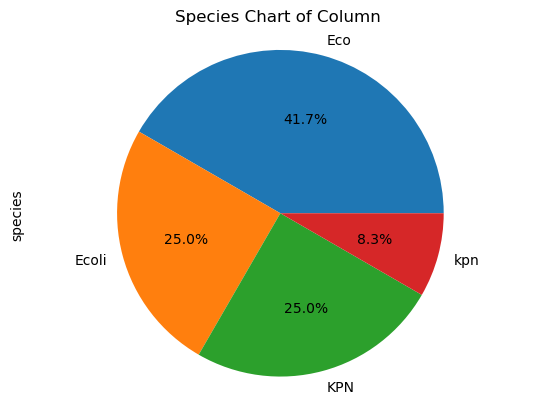

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column named 'column_name'
# Replace 'df' and 'column_name' with your actual DataFrame and column name

# Count the occurrences of each value in the column
value_counts = df_1['species'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%1.1f%%')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Add a title to the plot
plt.title('Species Chart of Column')

# Display the chart
plt.show()
